Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Analysis

In [3]:
data_info = pd.read_csv('./data/lending_club_info.csv')

In [4]:
data_info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [5]:
data = pd.read_csv('./data/lending_club_loan_two.csv')

In [6]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [8]:
data.shape

(396030, 27)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [10]:
data.loan_status

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

<Axes: xlabel='loan_status', ylabel='count'>

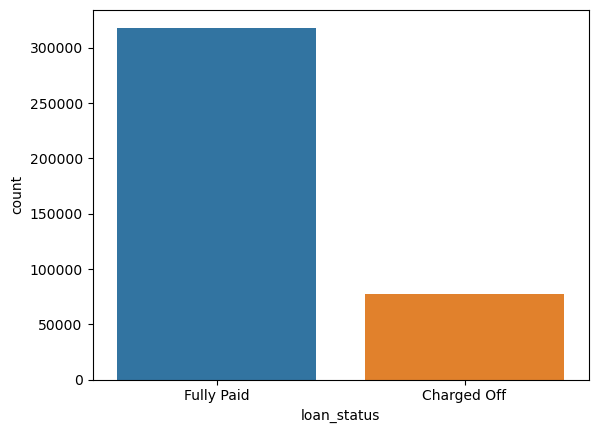

In [12]:
sns.countplot(data, x='loan_status')

c:\Users\iitka\.conda\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='loan_amnt', ylabel='Count'>

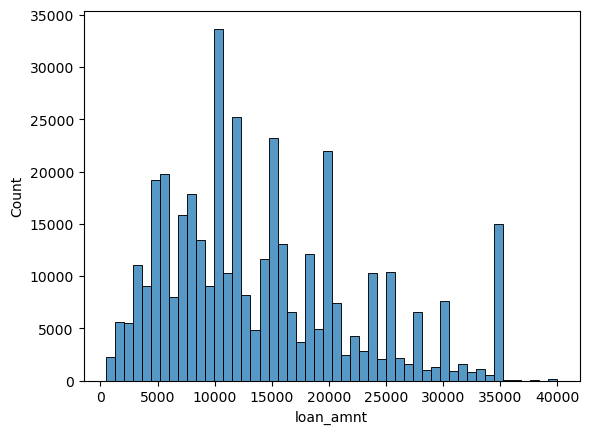

In [22]:
sns.histplot(data, x='loan_amnt', bins=50)

In [24]:
data.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Axes: >

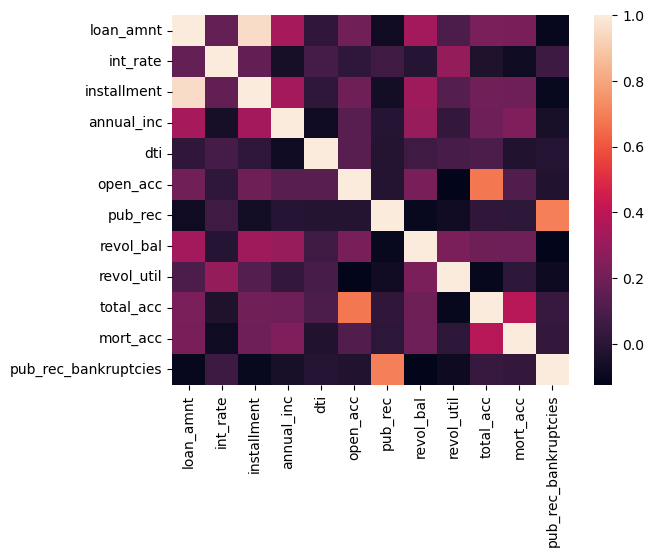

In [27]:
sns.heatmap(data.corr(numeric_only=True), cmap='')

<Axes: xlabel='loan_amnt', ylabel='installment'>

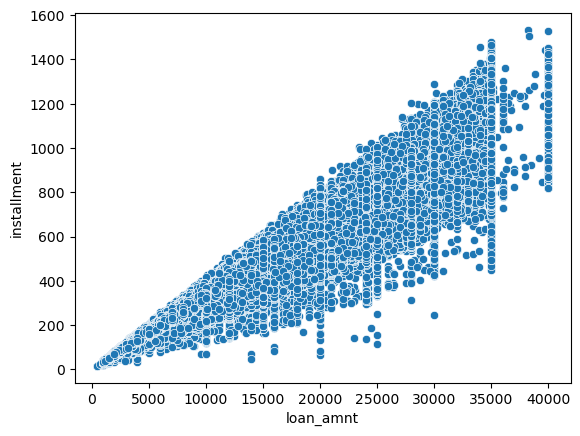

In [29]:
sns.scatterplot(data, y='installment', x='loan_amnt')

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

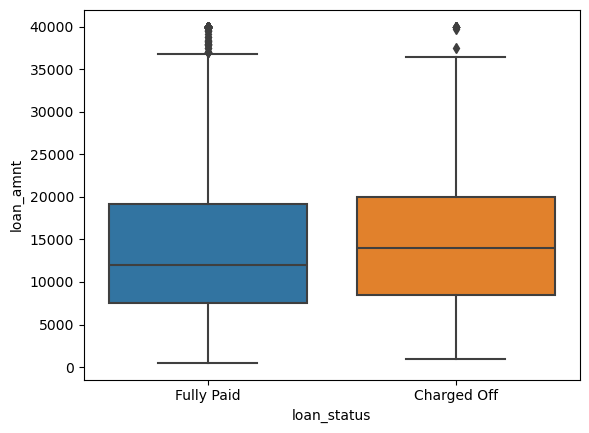

In [30]:
sns.boxplot(data, x='loan_status', y='loan_amnt')

<Axes: xlabel='loan_status', ylabel='installment'>

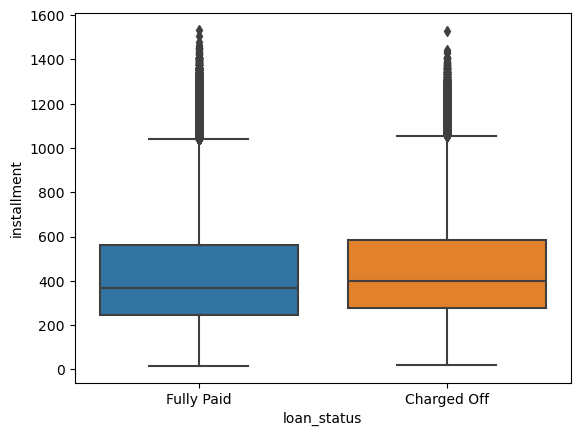

In [31]:
sns.boxplot(data, x='loan_status', y='installment')


In [34]:
data.groupby(by='loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [42]:
data['grade'].value_counts().sort_index()

grade
A     64187
B    116018
C    105987
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64

In [43]:
data['sub_grade'].value_counts().sort_index()

sub_grade
A1     9729
A2     9567
A3    10576
A4    15789
A5    18526
B1    19182
B2    22495
B3    26655
B4    25601
B5    22085
C1    23662
C2    22580
C3    21221
C4    20280
C5    18244
D1    15993
D2    13951
D3    12223
D4    11657
D5     9700
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64

<Axes: xlabel='grade', ylabel='loan_amnt'>

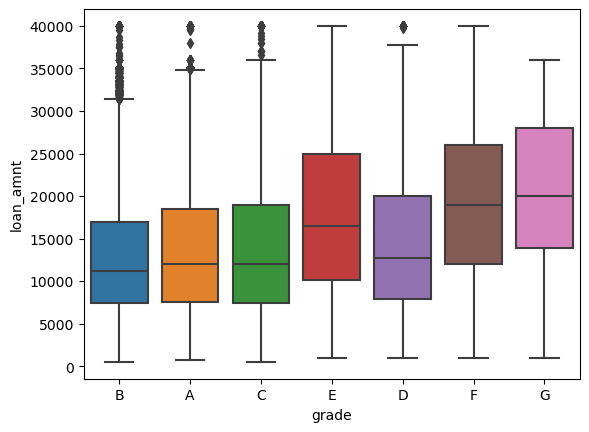

In [44]:
sns.boxplot(data, x='grade', y='loan_amnt')

<Axes: xlabel='grade', ylabel='count'>

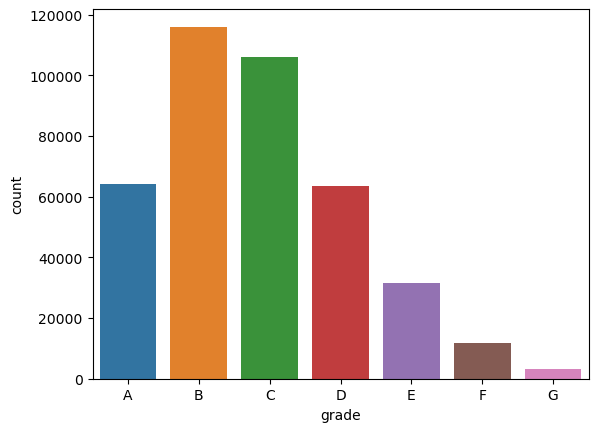

In [50]:
sns.countplot(data.sort_values(by='grade'), x='grade')

<Axes: xlabel='grade', ylabel='count'>

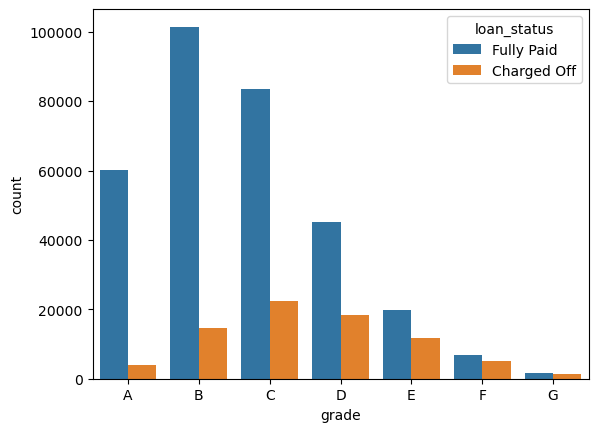

In [49]:
sns.countplot(data.sort_values(by='grade'), x='grade', hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

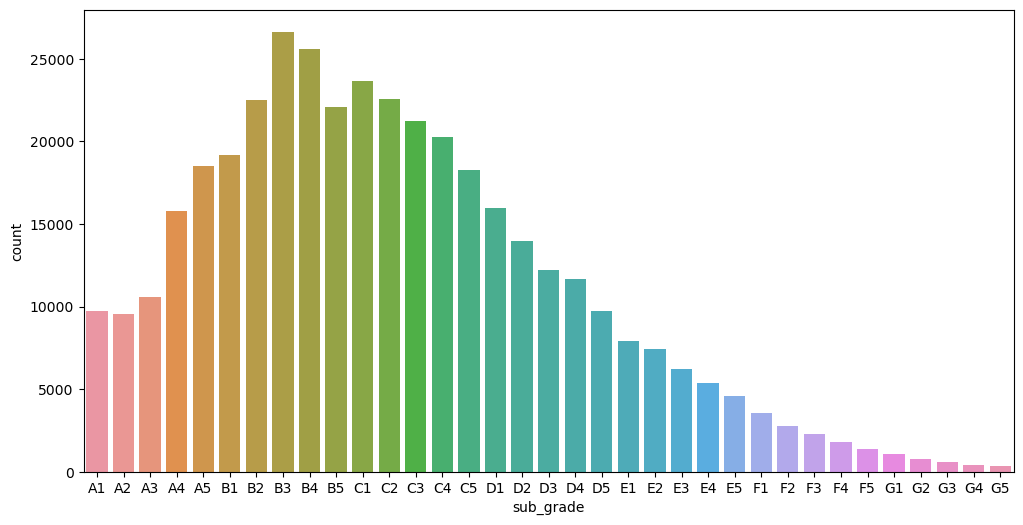

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(data.sort_values(by='sub_grade'), x='sub_grade')

<Axes: xlabel='sub_grade', ylabel='count'>

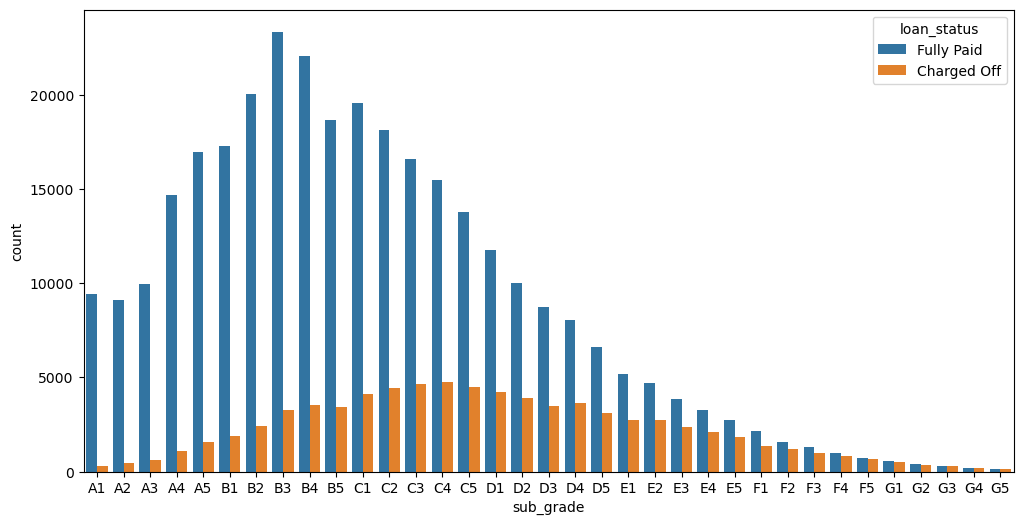

In [54]:
plt.figure(figsize=(12,6))
sns.countplot(data.sort_values(by='sub_grade'), x='sub_grade', hue='loan_status')

<Axes: xlabel='annual_inc', ylabel='loan_amnt'>

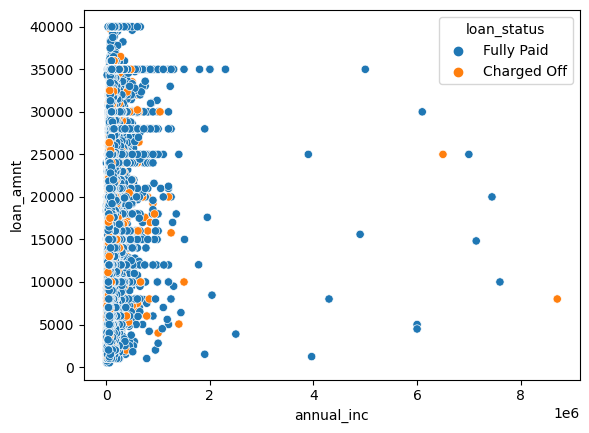

In [56]:
sns.scatterplot(data, x='annual_inc', y='loan_amnt', hue='loan_status')

In [62]:
data['dti'].value_counts()

dti
0.00     313
14.40    310
19.20    302
16.80    301
18.00    300
        ... 
59.18      1
48.37      1
45.71      1
42.38      1
55.53      1
Name: count, Length: 4262, dtype: int64

<Axes: xlabel='loan_status', ylabel='dti'>

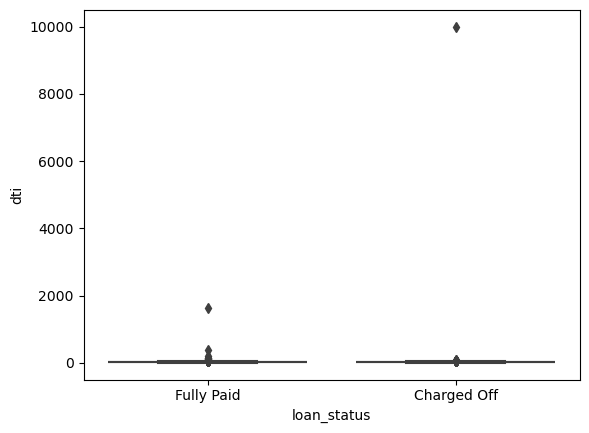

In [63]:
sns.boxplot(data, x='loan_status', y='dti')

In [64]:
data['loan_repaid'] = 0

In [65]:
data.loc[data['loan_status'] == 'Fully Paid', 'loan_repaid'] = 1

In [68]:
data[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<Axes: >

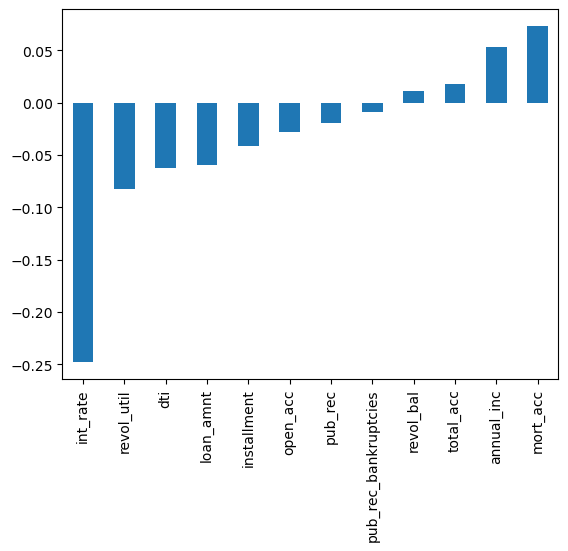

In [89]:
data.corr(numeric_only=True)['loan_repaid'].sort_values()[:-1].plot(kind='bar')